# Homework 3

Created by: Frendy

Date: 10/30/2020

The image folder has the images given for the homework

The output folder has the images that were created for the homework (Example: image1_crop.jpg)

# Dependencies

Please have the common libraries listed belowed installed.

In case you don't have it. Please install it by typing the following

## matplotlib
pip3 install matplotlib

## scipy
pip3 install scipy

## numpy
pip3 install numpy

## skimage
pip3 install scikit-image


In [216]:
############
# Numpy makes my computer run out of memory, fix it by forcing to not do multi threading
###########
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

In [217]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np

from PIL import Image

# importing "math" for mathematical operations  
import math  

from scipy.ndimage import gaussian_filter
from skimage.filters import sobel

In [218]:
#########################
# Problem 1 a
#########################

def my_gaussian_pyramid(
    image, 
    scale_factor = 2, 
    n_scales = 5,
    sigma = None
):
    
    # If sigma is not passed, put it as default value
    if sigma is None:
        sigma = 2*scale_factor/6.0
        
    # Get Current immage information
    img = np.array(mpimg.imread(image))

    # Output Variable,
    # Output image are a bunch of images, make a list
    outImg = []
    outImg.append(img)
    
    # maximum number of scales
    # Aka, how many times can we downsample it till sixe 1 pixel
    # Find if width or height is the biggest
    width, height = img.shape
    
    if(width > height):
        temp_max = width
    else:
        temp_max = height
    
    max_scales = math.ceil(math.log(temp_max, n_scales))
    
    max_scales = min(max_scales, n_scales)
    
    # Do Gaussian Pyramid
    # Loop n times, range is exclusive so do +1 
    for i in range(max_scales+1):
        # Apply low-pass filter
        im_blur = gaussian_filter(img, sigma)
        
        # Down sample
        im_small = im_blur[::scale_factor, ::scale_factor]
        
        # Add to output
        outImg.append(im_small)
        img = im_small
        
    return outImg

    


In [219]:
#########################
# Problem 1 b
#########################

def helperDisplay (my_gaussian_pyramid):
    # Read image to create the output image size
    
    x, y = my_gaussian_pyramid[0].shape
    
    # Output
    output = np.zeros((x, y*2))
    
    # Left side of image is always the original
    output[0:x, 0:y] = my_gaussian_pyramid[0]
    
    # Now output the right images
    tempx = 0
    tempy = y
    
    # Start at 1 because 0 is the original
    for i in range(1, len(my_gaussian_pyramid)):
        img = my_gaussian_pyramid[i]
        
        #Display image
        newx, newy = img.shape
        newx = newx + tempx
        newy = newy + tempy
        
        output[tempx:newx, y:newy] = img
        tempx = newx
    
    return output

Saving pyramid_sf2.jpg


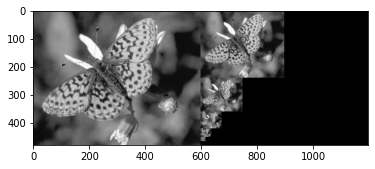

In [220]:
#########################
# Problem 1 b -> (1)
#########################
img = my_gaussian_pyramid('images/butterfly.png',2,5)
img = helperDisplay(img)
plt.imshow(img,cmap='gray')
print("Saving pyramid_sf2.jpg")
plt.savefig('output/pyramid_sf2.jpg')
plt.show()

Saving pyramid_sf3_sigma5.jpg


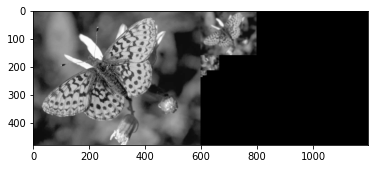

In [221]:
#########################
# Problem 1 b -> (2)
#########################
img = my_gaussian_pyramid('images/butterfly.png',3,10,5)
img = helperDisplay(img)
plt.imshow(img,cmap='gray')
print("Saving pyramid_sf3_sigma5.jpg")
plt.savefig('output/pyramid_sf3_sigma5.jpg')
plt.show()

Saving pyramid_edges.jpg


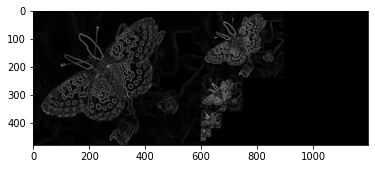

In [222]:
#########################
# Problem 1 c
#########################
img = my_gaussian_pyramid('images/butterfly.png',2,5)

# Create a new image list with Sobel
img_1 = sobel(img[0])
imgSobel = []
imgSobel.append(img_1)

for i in range(1,len(img)):
    tempImg = sobel(img[i])
    imgSobel.append(tempImg)

img = helperDisplay(imgSobel)
plt.imshow(img,cmap='gray')
print("Saving pyramid_edges.jpg")
plt.savefig('output/pyramid_edges.jpg')
plt.show()

'\nObservation:\nThe higher the scale, the less resolution we get. Thus, we can conclude that smaller images have lower resolution.\n'

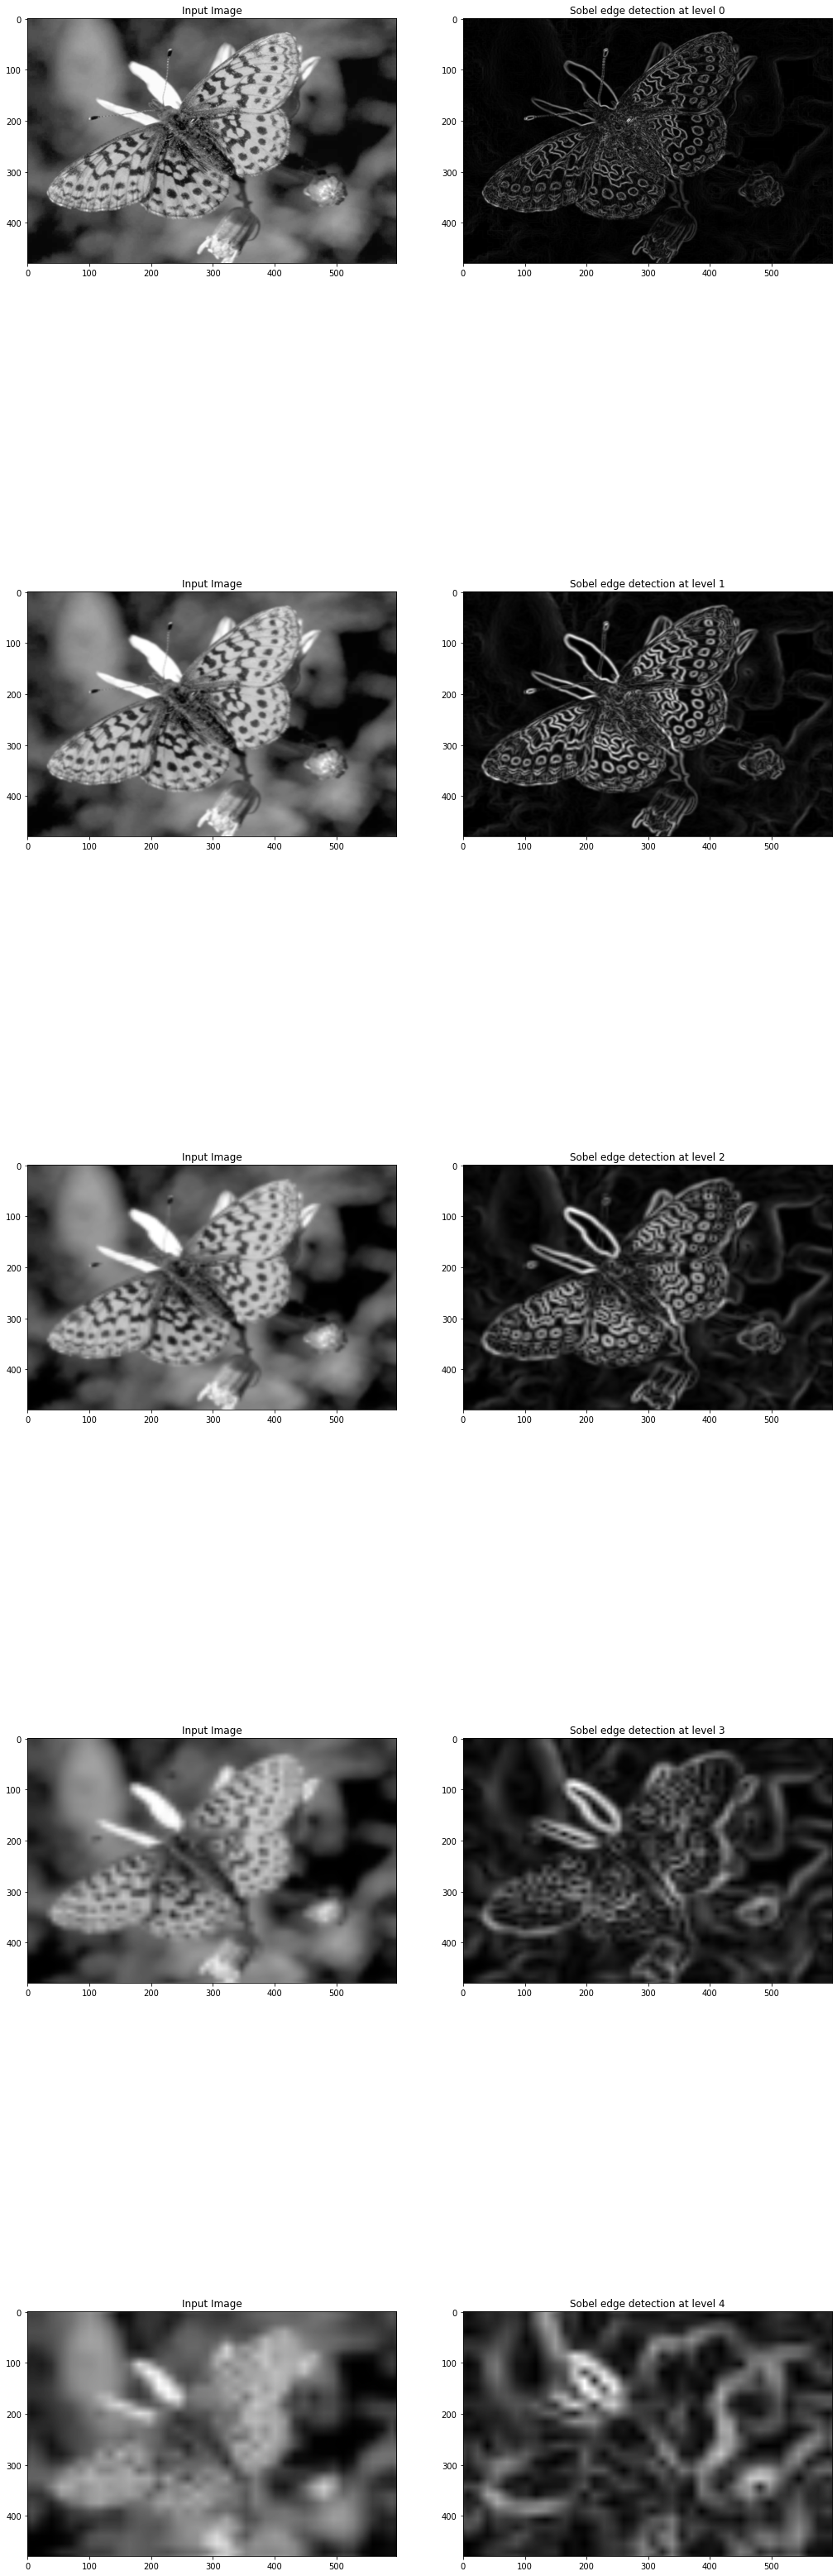

In [223]:
#########################
# Problem 1 d
#########################
from skimage.transform import resize

# Get original image from c
img = my_gaussian_pyramid('images/butterfly.png',2,5)

# Create a new image list with Sobel
img_1 = sobel(img[0])
imgSobel = []
imgSobel.append(img_1)

for i in range(1,len(img)):
    tempImg = sobel(img[i])
    imgSobel.append(tempImg)

# To plot images.    
fig, axes = plt.subplots(nrows=5, ncols=2)
fig.tight_layout()
fig.set_figheight(50)
fig.set_figwidth(15)

# Range is exclusive
i = 0
for k in range(0,5):
    output = img[k]
    outputSobel = imgSobel[k]
    
#   Resize all images to input image (butterfly.png size)
    output = resize(output, (img[0].shape[0], img[0].shape[1]),
                       anti_aliasing=True)
    outputSobel = resize(outputSobel, (img[0].shape[0], img[0].shape[1]),
                       anti_aliasing=True)
    if k == 0:
        plt.subplot(5,2,1)
    elif k == 1:
        plt.subplot(5,2,3)
    elif k == 2:
        plt.subplot(5,2,5)
    elif k == 3:
        plt.subplot(5,2,7)
    else:
        plt.subplot(5,2,9)
    
#   Input image  
    plt.imshow(output, cmap='gray', aspect='auto')
    plt.title('Input Image')

# Sobel edge
    plt.subplot(5,2,2*i + 2)
    plt.imshow(outputSobel, cmap='gray', aspect='auto')
    plt.title('Sobel edge detection at level '+ str(i))
    plt.imsave('output/pyramid_edge'+ str(i) + '.jpg', outputSobel, cmap='gray') 

    i = i + 1

##################
# Observation on the detected feature/strucutre
##################
"""
Observation:
The higher the scale, the less resolution we get. Thus, we can conclude that smaller images have lower resolution.
"""


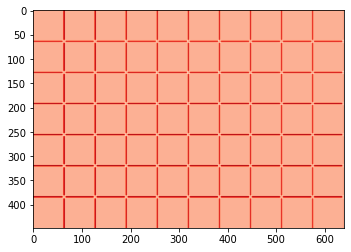

In [224]:
#########################
# Problem 2 a
#########################
# For Sobel (Derivatives) and gaussean
import cv2

# Make gray
from skimage.color import rgb2gray

def Harris_Corner_Detection(
    inputImage, 
    alpha = 0.05, 
    thresholding_factor = 0.1, 
    minDistance = 10
):
    
    # Import image
    # Convert the image to grayscale    
    img = rgb2gray(mpimg.imread(inputImage))
    
    #############################
    # Step 1, Compute derivates of the input image in x- and y- direction
    #############################
    
    # We will use sobel operator as it givse the x and y derivatives
    derivativeX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    derivativeY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
 
    #############################
    # Step 2, For each pixel, construct the second momemnt matrix M in a Gaussian window around the pixel
    #############################
    
    # Formula M = sum [I^2_x I_xI_y]
    #                  I_xI_y I_y^2
        
    tempX = derivativeX*derivativeX
    tempY = derivativeY*derivativeY
    tempXY = derivativeX*derivativeY
    
    # Blur them with GaussianBlur
    s_xx = cv2.GaussianBlur(tempX, (0,0), 1)
    s_xy = cv2.GaussianBlur(tempXY, (0,0), 1)
    s_yy = cv2.GaussianBlur(tempY, (0,0), 1)
    
    # Tried to make a Matrix, but ndimage.sobel returns a sequence
    # Get error if try to make a matrix 
        # setting an array element with a sequence.
    
    #     M = np.zeros((2,2))
    #     M[0][0] = tempX
    #     M[0][1] = tempXY
    #     M[1][0] = tempXY
    #     M[1][1] = tempY
    
    #############################
    # Step 3: Compute the corner response function
    #############################
    #𝑅=det(𝐌)−𝛼×trace2(𝐌)
    # Try to do matrix way but got error, computing it manually.
    
    # R = np.linalg.det(M) - alpha*np.trace(M)^2
    
    det = (s_xx*s_yy) - (s_xy*s_xy)
    trace = s_xx+s_yy
    
    R = det - (alpha*trace*trace)
    
    #############################
    # Step 4: Threshold the corner response value computed in Step 3
    #############################
    #threshold= thresholding_factormax_corner_response
    max_corner_response = np.max(R)
    threshold = thresholding_factor * max_corner_response
    newR = np.copy(R)
    # Anything that is above threshold is 0
    newR[newR > threshold] = 0
    
    #############################
    # Step 5: Find local maxima of response function (non-maximum suppresion)
    #############################
 
    # So right now we should have the corners
    newR = np.asarray(newR)
    listOfLocalMaxima = []
    listOfLocationsForLocalMaxima = []
    tempMax =np.amax(newR)
    
    # WindowSize to move
    windowSize = np.mgrid[-minDistance:minDistance+1]
    w, h = newR.shape
    for x in range(w):
        for y in range(h):
            tempValue = newR[x,y]

            # if higher, we add the point to our localmaxima
            
            # I get error when I do this, out of bounds :(
            #if tempValue > tempMax*threshold:
            
            if tempValue > threshold:
            
                tempx = x + windowSize
                tempy = y + windowSize

                # set to 0 all neightbours
                # Check if you inside the window
                if(tempx.all() < w - 2 and tempy.all() - 2 < h):
                    newR[tempx][tempy] = 0
                
                    # Add points to list
                    listOfLocalMaxima.append(tempValue)
                    tempCoordinates = [tempx,tempy]
                    listOfLocationsForLocalMaxima.append(tempCoordinates)
 


    #############################
    # Step 6: show resulting corners as red dots on top of the input imageas shown below.
    #############################  

    # make red dots
#     img[newR > threshold*np.amax(newR)] = [0,0,255]
#     for x in range(w):
#         for y in range(h):
#             if newR[x][y] > threshold*np.amax(newR[x][y]):
#                 img[x][y] = [0,0,255]
    plt.imshow(newR, "Reds_r")
    return newR

#################
# Test it with checkerboard.jpg
#################
test = Harris_Corner_Detection('images/checkerboard.jpg')


/home/frendy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


'\nObservation:\nHigher trhesholding makes the image darker and less.\nAlso, line are more thicker\n'

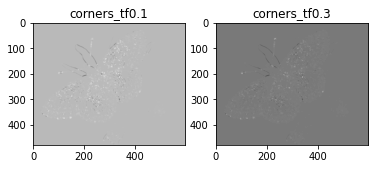

In [225]:
#########################
# Problem 2 b
#########################

## For 0.1 x (max_corner_response)
plt.subplot(1,2,1)
plt.title('corners_tf0.1')

img = Harris_Corner_Detection('images/butterfly.png')
plt.imshow(img, cmap='gray')  
plt.imsave('output/corners_tf0.1.jpg', img, cmap='gray')

## For 0.3 x (max_corner_response)
plt.subplot(1,2,2)
plt.title('corners_tf0.3')
img2 = Harris_Corner_Detection('images/butterfly.png', thresholding_factor = 0.3)
plt.imshow(img2, cmap='gray')  
plt.imsave('output/corners_tf0.3.jpg', img2, cmap='gray')

"""
Observation:
Higher trhesholding makes the image darker and less.
Also, line are more thicker
"""

/home/frendy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


'\nObservation:\nI cannot observe anychanges for threshold changes.\nThis implies that my harris function is not working correctly\n\nTheorerically:\nIf we change the window size, we will see that by increasing it,\nthe minimum distance, we will have more lines or points. \n'

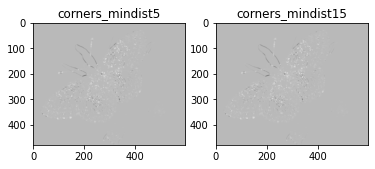

In [226]:

## For 5 minimum distance
plt.subplot(1,2,1)
plt.title('corners_mindist5')

img = Harris_Corner_Detection('images/butterfly.png', minDistance = 5 )
plt.imshow(img, cmap='gray')  
plt.imsave('output/corners_mindist5.jpg', img, cmap='gray')

## For 0.3 x (max_corner_response)
plt.subplot(1,2,2)
plt.title('corners_mindist15')
img2 = Harris_Corner_Detection('images/butterfly.png', minDistance = 15)
plt.imshow(img2, cmap='gray')  
plt.imsave('output/corners_mindist15.jpg', img2, cmap='gray')

"""
Observation:
I cannot observe anychanges for threshold changes.
This implies that my harris function is not working correctly

Theorerically:
If we change the window size, we will see that by increasing it,
the minimum distance, we will have more lines or points. 
"""

/home/frendy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


'\nObservation:\ncorners_tf0.1 is darker compare to cornesrs_rot.\n\nLooks like detected corner positions are not rotating by the same amount.\n\nImplying the Harris corner detection is not working\n\nTheorerically:\nThe detected corner position should rotate by the same amount.\n'

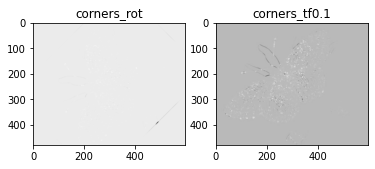

In [227]:
#########################
# Problem 2 c
#########################

plt.subplot(1,2,1)
plt.title('corners_rot')

img = Harris_Corner_Detection('images/butterfly_rotated.png')
plt.imshow(img, cmap='gray')  
plt.imsave('output/corners_rot.jpg', img, cmap='gray')

plt.subplot(1,2,2)
plt.title('corners_tf0.1')
img = mpimg.imread('output/corners_tf0.1.jpg')
plt.imshow(img, cmap='gray')  

"""
Observation:
corners_tf0.1 is darker compare to cornesrs_rot.

Looks like detected corner positions are not rotating by the same amount.

Implying the Harris corner detection is not working

Theorerically:
The detected corner position should rotate by the same amount.
"""

/home/frendy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


'\nObservation:\nWhen we scale it down, we can see the points or lines more visible.\n\nWe also observe that we are losing details/too much noise when we scale down\n'

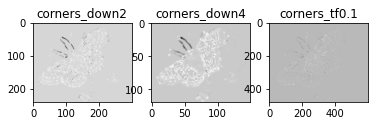

In [228]:
#########################
# Problem 2 D
#########################
fig.tight_layout()
fig.set_figheight(15)
fig.set_figwidth(15)

plt.subplot(1,3,1)
plt.title('corners_down2')

img = Harris_Corner_Detection('images/butterfly_down2.png')
plt.imshow(img, cmap='gray')  
plt.imsave('output/corners_down2.jpg', img, cmap='gray')

plt.subplot(1,3,2)
plt.title('corners_down4')
img = Harris_Corner_Detection('images/butterfly_down4.png')
plt.imshow(img, cmap='gray')
plt.imsave('output/corners_down4.jpg', img, cmap='gray')

plt.subplot(1,3,3)
plt.title('corners_tf0.1')
img = mpimg.imread('output/corners_tf0.1.jpg')
plt.imshow(img, cmap='gray')


"""
Observation:
When we scale it down, we can see the points or lines more visible.

We also observe that we are losing details/too much noise when we scale down
"""


In [ ]:

######################
# IGNORE
# ######################
# img = rgb2gray(mpimg.imread('images/checkerboard.jpg'))

# print(test)
# for points in test:
#     cv2.circle(img, (points[1], points[0]), 1, (0,0,255),1) 

# plt.imshow(img, cmap='gray') 

    # So right now we should have the corners
    # DO maxima
#     tempMax = np.amax(newR)
#     print(tempMax)
#     img[img > tempMax] = [0,0,255]
#     tempMax = 100000000
#     PointList = []
#     w,h = newR.shape
#     for row in range(w):
#         for col in range(h):
#             if (newR[row][col] > threshold):
#                 tempMax = newR[row][col]
            
#             skip = False
#             for nrow in range(minDistance):
#                 if skip == True:
#                     break
                    
#                 for ncol in range(minDistance):
#                     if row + nrow -2 < w and col + ncol - 2 < h:
#                         if newR[row + nrow - 2][col + ncol - 2] > tempMax:
#                             skip = True
#                             break
                            
#             if not skip:
#                 # Draw red circle
#                 PointList.append((row,col))
#     # Get the indexes of the non zero values
#     non_zero_points = np.nonzero(newR)
    
#     # FInd values at thouse coordunates
#     tempTuple = [(i, j) for i,j in zip(non_zero_points[0], non_zero_points[1])] 
#     tempValue = [abs(R)[i, j] for i, j in tempTuple]
    
#     # Sort them on the R value
#     SortedPoints = [tempTuple[i] for i in np.argsort(tempValue)[::-1]]
    
#     # Final output after non-maximum suppresion
#     nms_points = []
#     nms_points.append(SortedPoints[0])
    
#     for points in SortedPoints:
#         for nms_point in nms_points:
#             if abs(points[0] - nms_point[0]) < minDistance and abs(points[1] - nms_point[1]) < minDistance:
#                 break
#             else:
#                 nms_points.append(points)

    
    #     newR = np.asarray(newR)
    
#     listOfLocalMaxima = []
#     listOfLocationsForLocalMaxima = []
    
#     # WindowSize to move
#     windowSize = np.mgrid[-minDistance:minDistance+1]

#     for x in range(len(newR)):
#         for y in range(len(newR[x])):
#             tempValue = newR[x,y]

#             # if higher, we add the point to our localmaxima
#             if tempValue > threshold:
#                 tempx = x + windowSize
#                 tempy = y + windowSize

#                 # set to 0 all neightbours
#                 newR[tempx][tempy] = 0
                
#                 # Add points to list
#                 listOfLocalMaxima.append(tempValue)
#                 tempCoordinates = [x,y]
#                 listOfLocationsForLocalMaxima.append(tempCoordinates)
 

#Output is not the same as the image provided...

#How it should look like:
#Uncomment this for testing
# import cv2
# import numpy as np

# filename = 'images/checkerboard.jpg'
# img = cv2.imread(filename)
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# gray = np.float32(gray)
# dst = cv2.cornerHarris(gray,2,3,0.04)

# #result is dilated for marking the corners, not important
# dst = cv2.dilate(dst,None)

# # Threshold for an optimal value, it may vary depending on the image.
# img[dst>0.01*dst.max()]=[0,0,255]

# cv2.imshow('dst',img)
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()


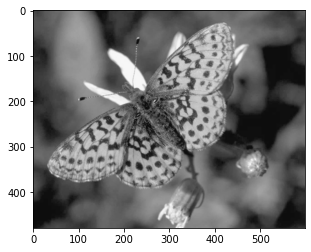

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/butterfly.png')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)



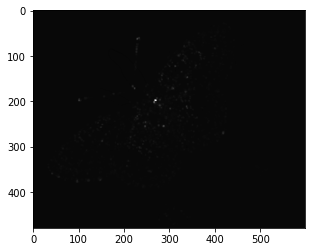

In [180]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')


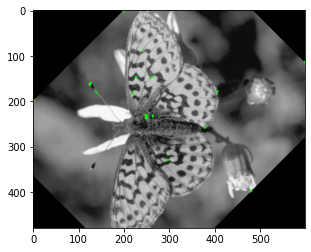

In [178]:
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

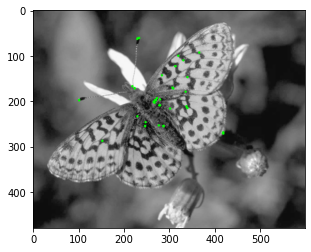

In [181]:
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)